# Batting Average Analysis
## For the start(ish) of the 2017 season
### MSP 04.29.2017

This jupyter notebook lays out some for for investigating average projections in 2017.

Full disclosure: I assumed going into this season that I'd be able to win batting average solely by picking an entire team of above-average batting average guys. Let's see how that belief holds up through this analysis...

In [1]:
from IPython.display import HTML
HTML('''<script>code_show=true; function code_toggle() { if (code_show){ $('div.input').hide();} else { $('div.input').show(); } code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# boilerplate imports

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

from random import randrange
import scipy.stats as sst




In [3]:
# now read in all the data: it's a lot, but is set up this way so that
#  we can slice across batting order.

#
# general fangraphs data for players
#
# all with > 100 PA at given lineup position

def read_team_batting_data(infile):
    BatData = np.genfromtxt(infile,\
                  dtype={'names': ("Team","G","AB","PA","H",\
                                   "1B","2B","3B","HR","R","RBI","BB","IBB",
                                   "SO","HBP","SF","SH","GDP","SB","CS","AVG"),\
                         'formats': ('S20','i2','f4','f4','f4',\
                                     'f4','f4','f4','f4','f4','f4','f4','f4',\
                                    'f4','f4','f4','f4','f4','f4','f4','f4')},\
                 skip_header=1,delimiter=',')
    return BatData


Teams2016 = read_team_batting_data('2016Batting/Team2016Totals.csv')

def read_batting_data(infile):
    BatData = np.genfromtxt(infile,\
                  dtype={'names': ("Name","Team","G","AB","PA","H",\
                                   "1B","2B","3B","HR","R","RBI","BB","IBB",
                                   "SO","HBP","SF","SH","GDP","SB","CS","AVG","playerid"),\
                         'formats': ('S20','S20','i2','f4','f4','f4',\
                                     'f4','f4','f4','f4','f4','f4','f4','f4',\
                                    'f4','f4','f4','f4','f4','f4','f4','f4','i2')},\
                 skip_header=1,delimiter=',')
    return BatData


def read_individual_game_data(infile):
    BatData = np.genfromtxt(infile,\
                  dtype={'names': ("Date","Team","Opp","BO","Pos","G","AB","PA","H",\
                                   "1B","2B","3B","HR","R","RBI","BB","IBB",
                                   "SO","HBP","SF","SH","GDP","SB","CS","AVG"),\
                         'formats': ('S20','S20','S20','i2','S4','i2','f4','f4','f4',\
                                     'f4','f4','f4','f4','f4','f4','f4','f4',\
                                    'f4','f4','f4','f4','f4','f4','f4','f4')},\
                 skip_header=2,delimiter=',')
    return BatData


Beltre2016 = read_individual_game_data('2016Batting/BeltreLog2016.csv')
Trout2016 = read_individual_game_data('2016Batting/TroutLog2016.csv')

Altuve2016 = read_individual_game_data('2016Batting/AltuveLog2016.csv')
Altuve2017 = read_individual_game_data('2016Batting/AltuveLog2017.csv')


Lemahieu2016 = read_individual_game_data('2016Batting/LemahieuLog2016.csv')
Lemahieu2017 = read_individual_game_data('2016Batting/LemahieuLog2017.csv')



Total2016   = read_batting_data('2016Batting/TotalBatting.csv')




Here's the nice thing about average: it's an average. That means that generally, once it stabilizes for players, we have a pretty good sense of who they are.

For fun, let's look at how much average matters for MLB teams (e.g. how much incentive do real baseball teams have to maximize this quantity?).

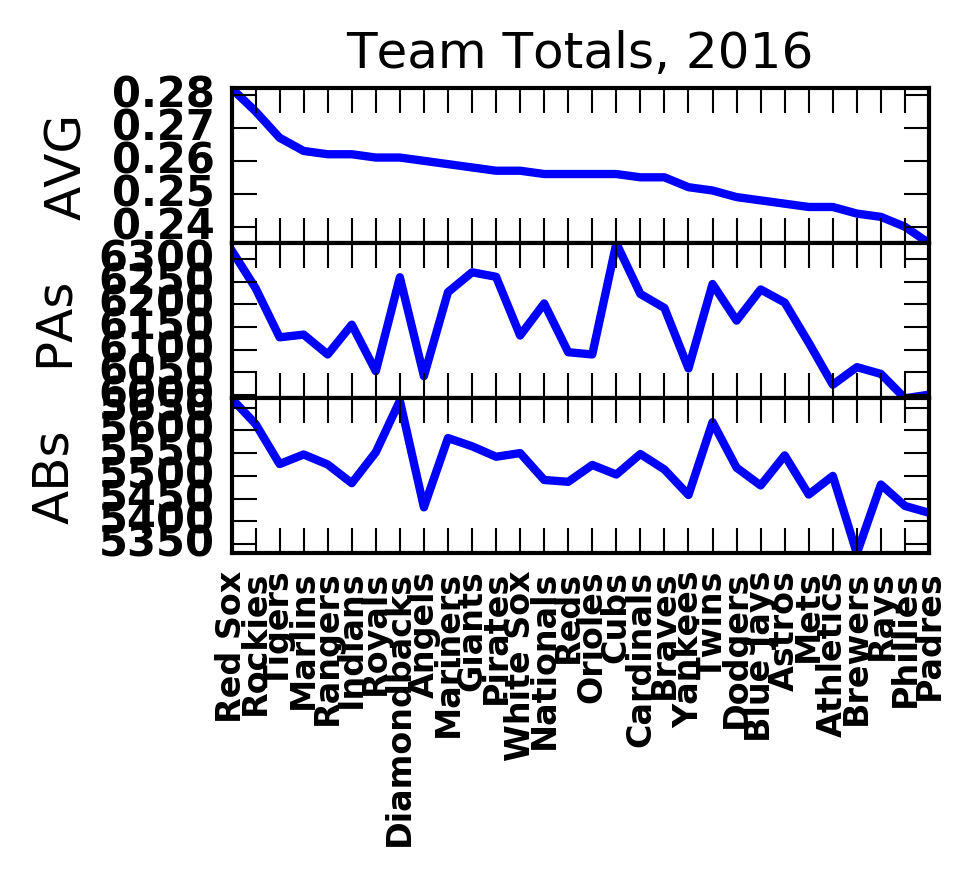

In [4]:
team_avg = Teams2016['AVG']
team_pas = Teams2016['PA']
team_abs = Teams2016['AB']

team_name = Teams2016['Team']

fig = plt.figure(figsize=(3,2))

plt.subplots_adjust(hspace=0.001)

ax = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax.plot(np.linspace(1.,team_avg.size,team_avg.size),team_avg[(-1.*team_avg).argsort()])
ax.set_ylabel('AVG',size=12)
ax.axis([1.,30.,np.min(team_avg),np.max(team_avg)])
_ = ax.set_xticks(np.linspace(1,30,30))


ax.set_xticklabels(())



ax2.plot(np.linspace(1.,team_pas.size,team_pas.size),team_pas[(-1.*team_avg).argsort()])
ax2.set_ylabel('PAs',size=12)
ax2.axis([1.,30.,np.min(team_pas),np.max(team_pas)])
_ = ax2.set_xticks(np.linspace(1,30,30))


ax2.set_xticklabels(())



ax3.plot(np.linspace(1.,team_abs.size,team_abs.size),team_abs[(-1.*team_avg).argsort()])
ax3.set_ylabel('ABs',size=12)
ax3.axis([1.,30.,np.min(team_abs),np.max(team_abs)])





ax.set_title('Team Totals, 2016')

# You can specify a rotation for the tick labels in degrees or with keywords.
_ = ax3.set_xticks(np.linspace(1,30,30))
_ = ax3.set_xticklabels(team_name[(-1.*team_avg).argsort()], rotation='vertical',size=8)

Based on the Cubs being in the dead middle, sub-.260, I'm going to say that teams aren't too concerned (they cared a lot more about PAs). This looks suspiciously like the park factor corrections as well...something there for later?

One quick thought to hold: 5% difference in PAs between the lowest and highest teams. There is a PA adjustment to be made here, but it's going to get dwarfed below.

Let's leave that behind and look at how actual individual players did with AVG in 2016:

Average AVG: 0.268798
Standard Deviation AVG: 0.0272817


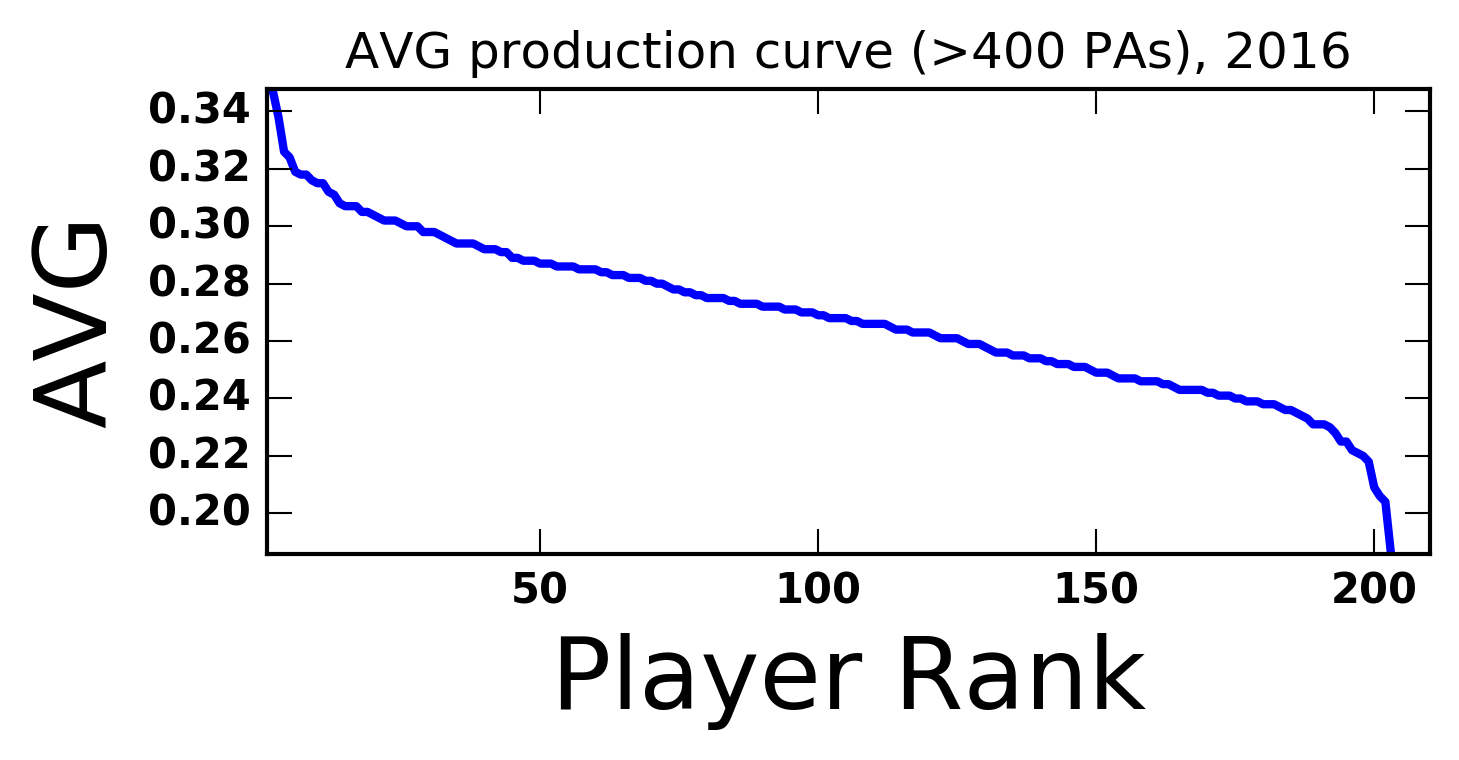

In [5]:
avg = Total2016['AVG']
pas = Total2016['PA']
names = Total2016['Name']

g_pas = np.where(pas>400)[0]

g_avg = avg[g_pas]

print 'Average AVG:',np.mean(g_avg)
print 'Standard Deviation AVG:',np.std(g_avg)

plt.figure(figsize=(5,2))
plt.plot(np.linspace(1.,g_avg.size,g_avg.size),g_avg[(-1.*g_avg).argsort()])
plt.xlabel('Player Rank',size=24)
plt.ylabel('AVG',size=24)
plt.title('AVG production curve (>400 PAs), 2016')
_ = plt.axis([1.,210.,np.min(g_avg),np.max(g_avg)])

Um...there were guys with over 400 PAs that hit sub-.200. Let's not lose any sleep over those guys.

League average is .269, standard deviation is 0.027. This means that 2/3rds of the guys are between 0.242 and 0.296.

I hate to do this to everyone who is out of school and assumed they would never have to look at another mathematical proof, but I feel obliged to point out that you cannot simply average together the batting average of all the guys on your team, because the equation below holds: 

\begin{equation} \frac{1}{N}\sum_{n=1}^N \frac{H_n}{AB_n} \ne \frac{\sum_{n=1}^N H_n}{\sum_{1}^N AB_n}\end{equation}

What this is telling us is that some weighting, $w_n$, is required for to make the equation true, e.g.

\begin{equation} \frac{1}{N}\sum_{n=1}^N w_n\frac{H_n}{AB_n} = \frac{\sum_{n=1}^N H_n}{\sum_{1}^N AB_n}\end{equation}

The weighting values should be straightforward to calculate: $w_n = \frac{1}{N} AB_n/\sum_{n=1}^N AB_n$, but are complicated by the volatile nature of ABs in baseball.

Here's a fun exercise: let's try and come up with a back-of-the envelope estimate you can do for your players, based on three things:
1. Where does the player bat in the order?
2. How often does the player walk?
3. What is the volatility of said player?

With those three factors in mind, we can try to make some measure of the relative weights of different players for forecasting average.


### Point 1: Where does a player bat in the order?

| Order        | ABs        | Hs | PAs  | $\Delta w_n$ |
| :---------: |:---------:| :-----:| :-----:|:-----------:|
| 1     | 20261 | 5526 |  22597  | +0.08 |
| 2      | 19814 | 5273     | 22077   |+0.06 |
| 3 | 19129 |  5342    | 21529    |+0.04 |
| 4 | 18740 |  4873    | 21039    | +0.02 |
| 5 | 18540 |  4805    | 20569    |  0.0 |
| 6 | 18097 |  4587    | 20053    |-0.02 |
| 7 | 17626 |  4325    | 19485    |-0.04 |
| 8 | 16915 |  4101    | 18923    |-0.06 |
| 9 | 16442 |  3444    | 18303    |-0.08 |

Quantifying this finally, 18% more PAs for the number 1 hitter than the number 9 hitter. Really, you shouldn't be rostering 9-hole guys (what's up Byron Buxton), so let's focus on the 10% difference between 1 and 6 (2% difference per spot in the order).  

### Point 2: How often does a player walk?

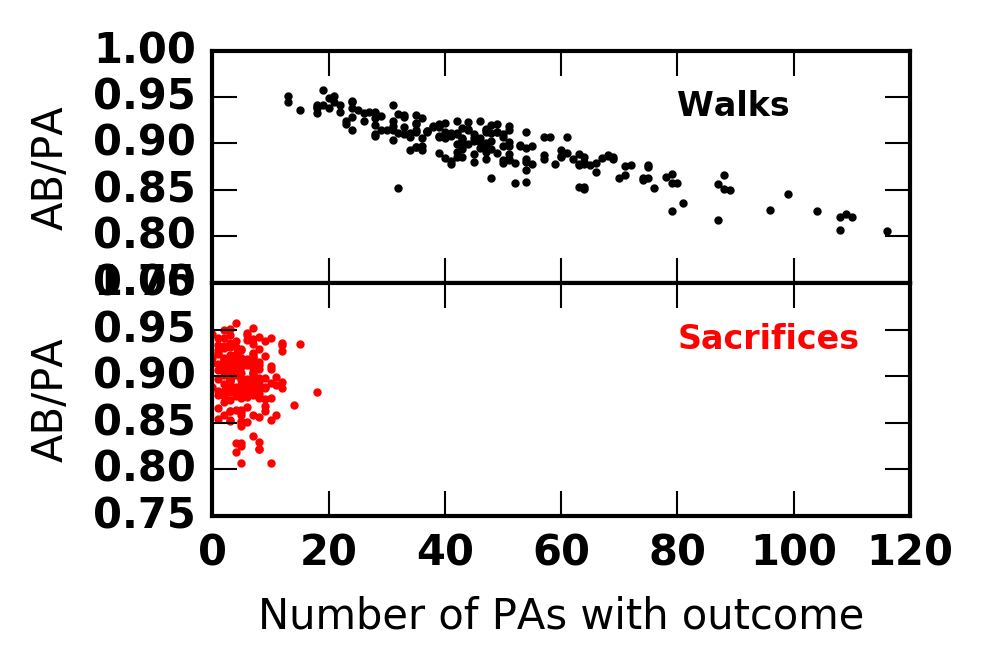

In [6]:
ab = Total2016['AB']
pas = Total2016['PA']
bbs = Total2016['BB']
sacs = Total2016['SF'] + Total2016['SH']
names = Total2016['Name']

g_pas = np.where(pas>400)[0]


fig = plt.figure(figsize=(3,2))

plt.subplots_adjust(hspace=0.001)

ax = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax.scatter(bbs[g_pas],ab[g_pas]/pas[g_pas],color='black',s=1.)
ax.text(80,0.93,'Walks',size=8)


ax.axis([0.,120.,0.75,1.0])
ax.set_ylabel('AB/PA')
ax.set_xticklabels(())

ax2.scatter(sacs[g_pas],ab[g_pas]/pas[g_pas],color='red',s=1.)
ax2.axis([0.,120.,0.75,1.0])
ax2.text(80,0.93,'Sacrifices',color='red',size=8)

ax2.set_ylabel('AB/PA')
ax2.set_xlabel('Number of PAs with outcome')



Whoa! There is a strong dependence on AB/PA with walks (not with sacrifices), which means that the guy on your team who walks a ton is not contributing to your average in the way you might naively expect for simple averaging.

Simple rule of thumb: every +10 walks is another -0.015, so use $\Delta w_n = -0.0015\cdot (BB - 60)$. Yes, I recognize this can go positive if a player has less than 60 walks in a full season, that's the purpose!

### Point 3: How volatile is a player?

A more hand-waving thing is trying to quantify the volatility to get a handle on the weighting values empirically. I'll take a guy on my team who I'm counting on to bring my average up: **Adrian Beltre**.

The process will go like this: draw a random 7-game sample from Beltre's 2016 season and count up the total ABs, then 

----Beltre----
Mean:  25.6759
Sigma:  5.67706431089
Skew:  -3.772879527
SkewSigma:  -0.27892485552
----Lemahieu----
Mean:  25.4374
Sigma:  5.75851380479
Skew:  -3.51280958178
SkewSigma:  -0.254207869148
----Altuve----
Mean:  26.8451
Sigma:  5.52676270433
Skew:  -4.15824526724
SkewSigma:  -0.320039714679
----Trout----
Mean:  23.321
Sigma:  5.31821013124
Skew:  -3.07453561227
SkewSigma:  -0.250686697058


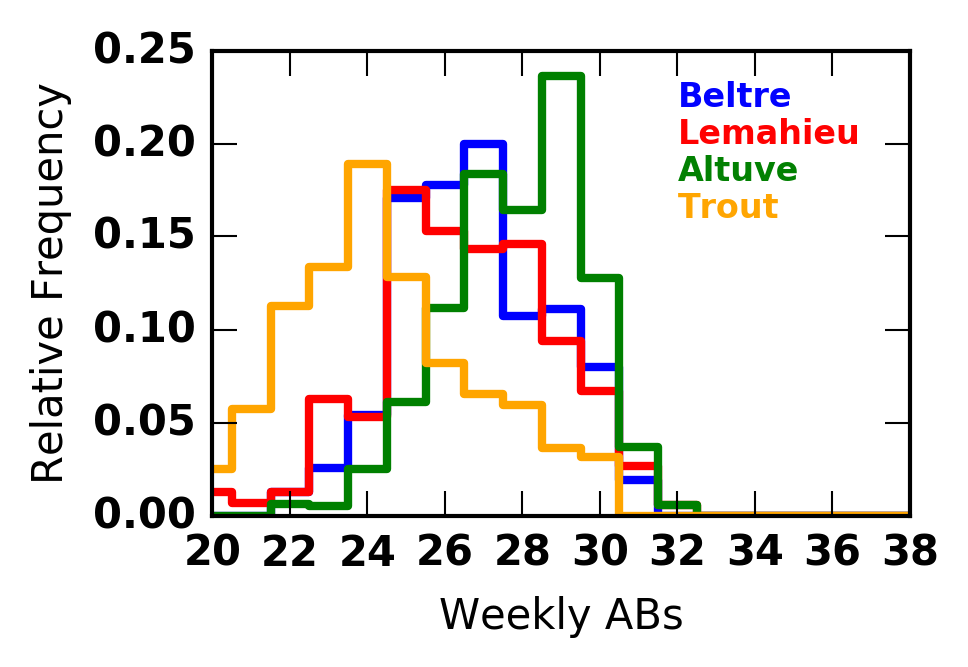

In [7]:


def ab_simulate(PlayerNotebook,Stat='AB',bins=np.arange(0,45,1),nsims=10000,verbose=1):
    
    vals = np.zeros(bins.shape[0])
    
    tvals = np.zeros(nsims)
    
    for indx in range(0,nsims):
        
        random_index = randrange(0,len(PlayerNotebook[Stat]))
        if random_index > len(PlayerNotebook[Stat])-7:
            continue
            
        vals[np.sum(PlayerNotebook[Stat][random_index:random_index+7])] += 1
        tvals[indx] = np.sum(PlayerNotebook[Stat][random_index:random_index+7])
    
    if verbose:
        print 'Mean: ',np.mean(tvals)
        print 'Sigma: ',np.std(tvals)
        print 'Skew: ',sst.skew(tvals)
        print 'SkewSigma: ',sst.skew(tvals)/np.std(tvals)**1.5

    return bins,vals,tvals

print '----Beltre----'
BeltreB,BeltreV,BeltreT = ab_simulate(Beltre2016)

print '----Lemahieu----'
LemahieuB,LemahieuV,LemahieuT = ab_simulate(Lemahieu2016)

print '----Altuve----'
AltuveB,AltuveV,AltuveT = ab_simulate(Altuve2016)

print '----Trout----'
TroutB,TroutV,TroutT = ab_simulate(Trout2016)





plt.figure(figsize=(3,2))
plt.plot(BeltreB,BeltreV/10000.,drawstyle='steps-mid',color='blue')
plt.plot(LemahieuB,LemahieuV/10000.,drawstyle='steps-mid',color='red')
plt.plot(AltuveB,AltuveV/10000.,drawstyle='steps-mid',color='green')
plt.plot(TroutB,TroutV/10000.,drawstyle='steps-mid',color='orange')

plt.text(32,0.22,'Beltre',color='blue',size=8)
plt.text(32,0.2,'Lemahieu',color='red',size=8)
plt.text(32,0.18,'Altuve',color='green',size=8)
plt.text(32,0.16,'Trout',color='orange',size=8)



plt.ylabel('Relative Frequency')
plt.xlabel('Weekly ABs')
_ = plt.axis([20.,38.,0.,0.25])


#4.21 PA/game for average 5 hitter

First, remember that Trout's lower average weekly ABs is already being adjusted for by the walk rate factor above.

For Beltre, an average 7-game run has 25 ABs, but could easily be 20 or 30. That's a 20% swing right there, which could swamp the other two factors above.

This is telling me that volatility can play a huge role, but also that we don't want to overrate it, so I'll put a pretty heavy softening on it. Above, we're using the third moment of a gaussian distribution, _skewness_, to measure which way the distribution leans. More negative means the player has weeks with fewer ABs--$\Delta w_n$ is more negative. 

This is still an experiment, and working from small sample size study right now--I'm pegging **DJ LeMahieu**, a man who's name I just learned to spell and the 2016 NL batting champ, as the zero point, so I'll throw out the relation \begin{equation}\Delta w_n = \left( \frac{S}{K^{3/2}} + 0.26\right). \end{equation} By this metric, we find

| Player        | $S(K^{-3/2})$        |  $\Delta w_n$ |
| :------------: |:-----------------:| :----------:| 
| Trout | -0.24 | +0.02 |
| Lemahieu | -0.26 | +0.0 |
| Beltre | -0.30 | -0.04 |
| Altuve | -0.31 | -0.05 |




### Wrap-Up

No wonder my plan to win average is floudering--I'm not weighting my players properly! 

Here's the total table for the four guys above:

| Player        | Order Adj.        |  BB Adj.  | Vol. Adj. | $\Delta w_n$ |
| :------------: |:-----------------:| :----------:| :----------:| :----------:|
| Lemahieu | +0.06 | -0.01  | +0.0 | +0.05 |
| Trout | +0.06 | -0.08 | +0.02 |  +0.0 |
| Beltre | +0.02 | -0.02 | -0.04 | +0.0 |
| Altuve | +0.04 | +0.0  | -0.05 | -0.01 |

Wow is Lemahieu valuable for winning average. Not really large adjustments off the top for the other guys--Trout has large corrections, but they largely balance out. Does that suggest volatility could still be in play?

I kind of dodged the point here, I think--I'm not really doing anything about forecasting average, this is more of a nuts-and-bolts how-to-win-average-in-your-league type stuff.

#### Epilogue

One more annoying thing: Eventually, $w_n$ has to be normalized from the above adjustments so that $\sum_{n=1}^N w_n = 1$. So after you've finished plugging stuff in above, you have to go back through the team and normalize to 1 if you want to actually try and compute your own weekly average.

Note that in the long run, we can use the moments of the AB for a given team to empirically measure the ABs per week for a team. For now, this is a faster method, I think.

